In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our videos and Haarcascade Classifiers
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/videos.zip
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip

!unzip -qq haarcascades.zip
!unzip -qq videos.zip

--2022-09-29 01:37:09--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/videos.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 3.5.246.154
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|3.5.246.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4142728 (4.0M) [application/zip]
Saving to: ‘videos.zip.1’

videos.zip.1        100%[===================>]   3.95M  1.00MB/s    in 4.1s    

2022-09-29 01:37:14 (990 KB/s) - ‘videos.zip.1’ saved [4142728/4142728]

--2022-09-29 01:37:14--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.18
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.18|:443... connected.
HTTP re

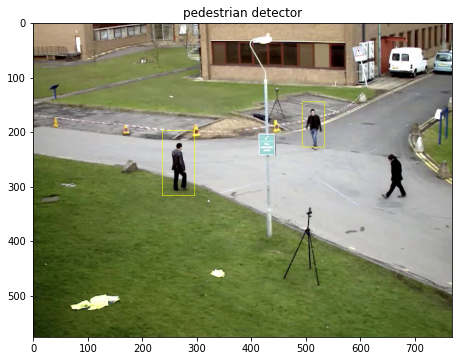

In [29]:
cap = cv2.VideoCapture('/content/walking.mp4')

body_classifier = cv2.CascadeClassifier('/content/Haarcascades/haarcascade_fullbody.xml')

ret, frame = cap.read()

if ret:
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  bodies = body_classifier.detectMultiScale(gray,1.2, 3)

  for (x,y,w,h) in bodies:
    cv2.rectangle(frame, (x,y), (x+w, y+h),(0,255,255,2))

cap.release()
imshow("pedestrian detector", frame)

In [30]:
cap = cv2.VideoCapture("/content/walking.mp4")

w = int(cap.get(3))
h = int(cap.get(4))

out = cv2.VideoWriter("/content/walking_output.avi", cv2.VideoWriter_fourcc('M','J','p','G'), 30, (w, h))

body_detector = cv2.CascadeClassifier('/content/Haarcascades/haarcascade_fullbody.xml')

while(True):

  ret, frame = cap.read()
  if ret:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    bodies = body_detector.detectMultiScale(gray, 1.2, 3)

    for (x,y,w,h) in bodies:
      cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 255), 2)

    out.write(frame)
  else:
    break

cap.release()
out.release()

In [31]:
!ffmpeg -i /content/walking_output.avi walking_output.mp4 -y

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [32]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/walking_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [33]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

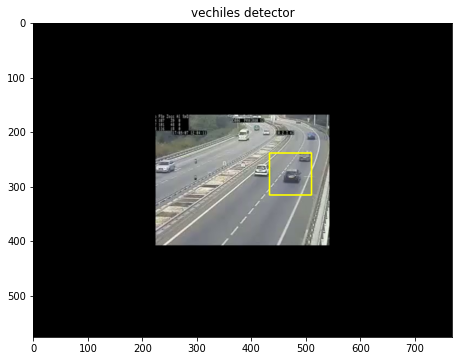

In [35]:
cap = cv2.VideoCapture('/content/cars.mp4')

vehicle_detector = cv2.CascadeClassifier('/content/Haarcascades/haarcascade_car.xml')
ret, frame = cap.read()

if ret:
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  vehicles = vehicle_detector.detectMultiScale(gray, 1.4, 2)

  for (x,y,w,h) in vehicles:
    cv2.rectangle(frame,(x,y), (x+w, y+h),(0,255,255), 2)

cap.release()
imshow("vechiles detector", frame)

In [41]:
cap = cv2.VideoCapture("/content/cars.mp4")
w = int(cap.get(3))
h = int(cap.get(4))

out = cv2.VideoWriter('cars_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w,h))

vehicles_detector = cv2.CascadeClassifier("/content/Haarcascades/haarcascade_car.xml")
while(True):
  ret, frame = cap.read()
  if ret:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    vehicles = vehicles_detector.detectMultiScale(gray, 1.2,3)
    
    for(x,y,w,h) in vehicles:
      cv2.rectangle(frame,(x,y),(x+w, y+h),(0,255,255),2)
    
    out.write(frame)
  else:
    break

cap.release()
out.release()

In [45]:
!ffmpeg -i /content/cars_output.avi cars_output.mp4 -y

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [46]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/cars_output.mp4','rb').read()
data_url ="data:video/mp4;base64," + b64encode(mp4).decode()

In [47]:
HTML("""
<video controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)